In [22]:
import networkx as nx
import matplotlib.pyplot as plt

class Graph:
    def __init__(self):
        self.data = []

    class GNode:
        def __init__(self, n):
            self.label = n
            self.adj = []

    def add_edge(self, from_loc, to_loc):
        self.data[from_loc].adj.append(to_loc)

    def explore_network(self, vertex_no, seen):
        if not seen[vertex_no]:
            seen[vertex_no] = True
            print(f"{self.get_vertex(vertex_no)} visited")
            for adj_vertex in self.data[vertex_no].adj:
                self.explore_network(adj_vertex, seen)

    def get_vertex(self, vno):
        return self.data[vno].label

    def add_vertex(self, st):
        self.data.append(self.GNode(st))

    def find_vertex(self, st):
        for j in range(len(self.data)):
            if self.data[j].label == st:
                return j
        return -1

    def add_directed_edge(self, from_loc, to_loc):
        from_loc = self.find_vertex(from_loc)
        to_loc = self.find_vertex(to_loc)
        if from_loc == -1 or to_loc == -1:
            exit(0)  # exception
        self.add_edge(from_loc, to_loc)

    def add_undirected_edge(self, from_loc, to_loc):
        from_loc = self.find_vertex(from_loc)
        to_loc = self.find_vertex(to_loc)
        if from_loc == -1 or to_loc == -1:
            exit(0)  # exception
        self.add_edge(from_loc, to_loc)
        self.add_edge(to_loc, from_loc)

    def traverse_reachable_graph(self, start=None):
        seen = [False] * len(self.data)
        if start:
            vno = self.find_vertex(start)
            if vno == -1:
                exit(0)  # exception
            self.explore_network(vno, seen)
        else:
            self.explore_network(0, seen)

    def traverse_complete_graph(self):
        seen = [False] * len(self.data)
        for j in range(len(self.data)):
            if not seen[j]:
                print("starting traversal ...")
                self.explore_network(j, seen)

    def visualize_graph(self):
        G = nx.Graph()

        for node in self.data:
            G.add_node(node.label)

        for i, node in enumerate(self.data):
            for adj_vertex in node.adj:
                G.add_edge(node.label, self.data[adj_vertex].label)

        pos = nx.spring_layout(G)
        nx.draw(G, pos, with_labels=True, font_weight='bold')
        plt.show()

    def visualize_graph(self):
        G = nx.Graph()

        for node in self.data:
            G.add_node(node.label)

        for i, node in enumerate(self.data):
            for adj_vertex in node.adj:
                G.add_edge(node.label, self.data[adj_vertex].label)

        pos = nx.spring_layout(G)

        # Draw nodes with custom attributes
        nx.draw_networkx_nodes(G, pos, node_size=700, node_color='skyblue', alpha=0.7)

        # Draw edges with custom attributes
        nx.draw_networkx_edges(G, pos, width=2, edge_color='gray', alpha=0.7)

        # Draw labels
        nx.draw_networkx_labels(G, pos, font_size=12, font_color='black')

        
        plt.axis('off')
        plt.show()




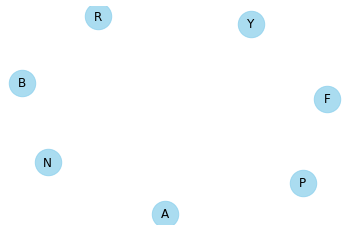

In [23]:
f = Graph()

f.add_vertex("B")
f.add_vertex("R")
f.add_vertex("N")
f.add_vertex("F")
f.add_vertex("A")
f.add_vertex("P")
f.add_vertex("Y")

f.visualize_graph()



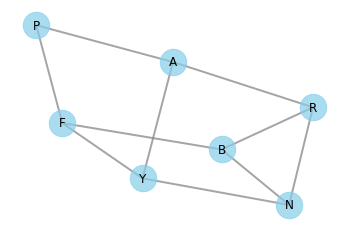

In [24]:
f.add_directed_edge("R", "N")
f.add_directed_edge("B", "F")
f.add_directed_edge("A", "P")
f.add_directed_edge("R", "A")
f.add_directed_edge("P", "F")
f.add_directed_edge("N", "B")
f.add_directed_edge("Y", "N")
f.add_directed_edge("Y", "F")
f.add_directed_edge("Y", "A")
f.add_directed_edge("R", "B")

f.visualize_graph()

In [25]:
print("\nExplore Reachable Graph starting from")
print("=============")
f.traverse_reachable_graph("Y")
print("\nExplore Reachable Graph starting from")
print("=============")
f.traverse_reachable_graph()
print("\nExplore Complete Graph starting from")
print("=============")
f.traverse_complete_graph()



Explore Reachable Graph starting from
Y visited
N visited
B visited
F visited
A visited
P visited

Explore Reachable Graph starting from
B visited
F visited

Explore Complete Graph starting from
starting traversal ...
B visited
F visited
starting traversal ...
R visited
N visited
A visited
P visited
starting traversal ...
Y visited
